## Load data 

* Use ETL Data Reader to load hiragana

https://github.com/CaptainDario/ETLCDB_data_reader


In [3]:
import numpy as np
from etldr.etl_data_reader import ETLDataReader

path_to_data_set = "./ETL_data_set_folder/"


reader = ETLDataReader(path_to_data_set)

from etldr.etl_data_names import ETLDataNames
from etldr.etl_character_groups import ETLCharacterGroups

#include = [ETLCharacterGroups.katakana]
include = [ ETLCharacterGroups.hiragana ]
#include = [ ETLCharacterGroups.katakana ]
imgs, labels = reader.read_dataset_part(ETLDataNames.ETL9, include)

print(labels)

Loading all data set files (ETL9_x) from: ./ETL_data_set_folder/ETL9...


  0%|          | 0/4780 [00:00<?, ?it/s]

  0%|          | 0/4780 [00:00<?, ?it/s]

  0%|          | 0/4780 [00:00<?, ?it/s]

  0%|          | 0/4780 [00:00<?, ?it/s]

  0%|          | 0/4780 [00:00<?, ?it/s]

  0%|          | 0/4780 [00:00<?, ?it/s]

  0%|          | 0/4780 [00:00<?, ?it/s]

  0%|          | 0/4780 [00:00<?, ?it/s]

  0%|          | 0/4780 [00:00<?, ?it/s]

  0%|          | 0/4780 [00:00<?, ?it/s]

  0%|          | 0/4780 [00:00<?, ?it/s]

  0%|          | 0/4780 [00:00<?, ?it/s]

  0%|          | 0/4780 [00:00<?, ?it/s]

  0%|          | 0/4780 [00:00<?, ?it/s]

  0%|          | 0/4780 [00:00<?, ?it/s]

  0%|          | 0/4780 [00:00<?, ?it/s]

  0%|          | 0/4780 [00:00<?, ?it/s]

  0%|          | 0/4780 [00:00<?, ?it/s]

  0%|          | 0/4780 [00:00<?, ?it/s]

  0%|          | 0/4780 [00:00<?, ?it/s]

  0%|          | 0/4780 [00:00<?, ?it/s]

  0%|          | 0/4780 [00:00<?, ?it/s]

  0%|          | 0/4780 [00:00<?, ?it/s]

  0%|          | 0/4780 [00:00<?, ?it/s]

  0%|          | 0/4780 [00:00<?, ?it/s]

  0%|          | 0/4780 [00:00<?, ?it/s]

  0%|          | 0/4780 [00:00<?, ?it/s]

  0%|          | 0/4780 [00:00<?, ?it/s]

  0%|          | 0/4780 [00:00<?, ?it/s]

  0%|          | 0/4780 [00:00<?, ?it/s]

  0%|          | 0/4780 [00:00<?, ?it/s]

  0%|          | 0/4780 [00:00<?, ?it/s]

  0%|          | 0/956 [00:00<?, ?it/s]

['あ' 'い' 'う' ... 'わ' 'を' 'ん']


### Inspect data

* View shape and one example

In [4]:
imgs.shape

(12075, 64, 64, 1)

In [5]:
len(imgs)

12075

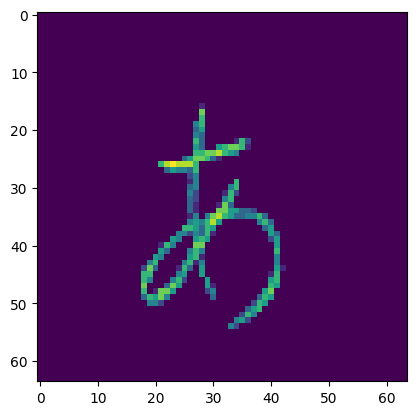

In [6]:
import matplotlib.pyplot as plt
plt.imshow(imgs[0])

In [8]:
labels

array(['あ', 'い', 'う', ..., 'わ', 'を', 'ん'], dtype='<U1')

### Define encoding of labels

In [9]:
import numpy as np

np.unique(labels)
encoding={}
len(np.unique(labels))

75

* generate one hot coding of labels

In [10]:
for i, label in enumerate(np.unique(labels)):
    encoding[label] = i

In [11]:
decoding={}
for key, val in encoding.items():
    decoding[val] = key

In [12]:
import pickle
with open('labels.pkl', 'wb') as f:
    pickle.dump(decoding, f)

In [13]:
imgsblack =1 - imgs

In [14]:
y = map(lambda x: encoding[x], labels)
y = np.array(list(y))

### Visualize more data examples

* Let's look at 30 examples

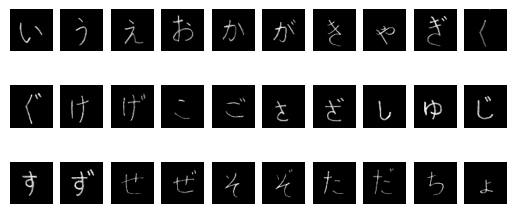

In [15]:

import matplotlib.pyplot as plt

figure = plt.figure()
num_of_images = 30

for index in range(1, num_of_images + 1):
    plt.subplot(5, 10, index)
    plt.axis('off')
    plt.imshow(imgsblack[index]*255., cmap='gray_r')

In [16]:
X = imgs

## Prepare data for training

In [17]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.utils import shuffle
from pathlib import Path

In [18]:
X= np.transpose(X, (0,3,1,2))

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(
     X, y, test_size=0.1, random_state=42)

In [20]:
X.shape

(12075, 1, 64, 64)

### Prepare tensor datasets and dataloaders

In [21]:
train_data = TensorDataset( torch.tensor(X_train,dtype=torch.float), torch.tensor(y_train,dtype=torch.int64) ) 
val_data = TensorDataset(torch.tensor(X_val,dtype=torch.float), torch.tensor(y_val,dtype=torch.int64))

train_loader = DataLoader(train_data, batch_size=32, shuffle=True,pin_memory=True)
val_loader = DataLoader(val_data, batch_size=32, shuffle=True, pin_memory=True)

(3, 266, 530)


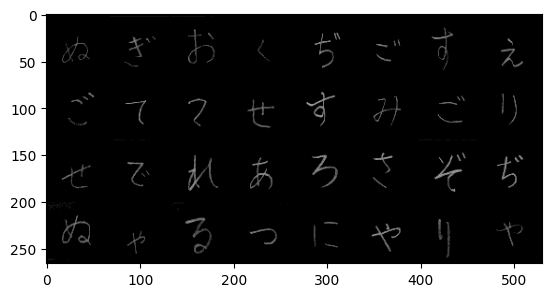

38849281419314323221195714682133700711524283861692937616862


In [22]:
import torchvision

import matplotlib.pyplot as plt
import numpy as np


def imshow(img):
    img = img   
    npimg = img.numpy()
    print(npimg.shape)
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


dataiter = iter(train_loader)
images, blabels = next(dataiter)

imshow(torchvision.utils.make_grid(images))

print(''.join('%1s' % blabels[j].numpy() for j in range(32)))

In [23]:
images.shape

torch.Size([32, 1, 64, 64])

In [24]:
labels

array(['あ', 'い', 'う', ..., 'わ', 'を', 'ん'], dtype='<U1')

In [28]:
!ls Data/Hiragana/

/bin/bash: /home/sutclw/anaconda3/envs/torch/lib/libtinfo.so.6: no version information available (required by /bin/bash)
train  validation


### Code to save data for a later augmented training

In [43]:
path = 'Data/Hiragana'
datatypes = ['validation', 'training']
data = {'training': (X_train,y_train), 'validation' : (X_val,y_val)}
for datatype in data.keys():
    
    for i in range(len(labels)):
        Path(f"{path}/{datatype}/{labels[i]}").mkdir(parents=True, exist_ok=True)
    X, y = data[datatype]
    for i in range(len(y)):
        from PIL import Image
        #print(X[i].shape)
        im = Image.fromarray((X[i]*255).reshape((64, 64)).astype('uint8'))
        im.save(f"{path}/{datatype}/{decoding[y[i]]}/example{i}.jpeg")


In [44]:
import os

path = 'Data/Hiragana'
img_names = []

for folder, subfolders, filenames in os.walk(path):
    for img in filenames:
        img_names.append(folder+'/'+img)
        
print('Images: ',len(img_names))

Images:  12075


## Defining CNN Model

In [45]:
if torch.cuda.is_available():
  device = 'cuda' 
else:
  device = 'cpu' 

In [46]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3)
        self.conv1_bn = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(32, 32, 3)
        self.conv2_bn = nn.BatchNorm2d(32)
        self.conv3 = nn.Conv2d(32, 64, 3)
        self.conv3_bn = nn.BatchNorm2d(64)
        self.conv4 = nn.Conv2d(64, 64, 3)
        self.conv4_bn = nn.BatchNorm2d(64)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 13 * 13, 128)
        self.fc2 = nn.Linear(128, 75)
        self.dropOut = nn.Dropout(0.2)

    def forward(self, x):
        x = F.relu(self.conv1_bn(self.conv1(x)))
        x = self.dropOut(x)
        x = F.relu(self.conv2_bn(self.conv2(x)))
        x = self.dropOut(x)
        x = F.max_pool2d(x, 2, 2)
        x = self.dropOut(x)
        x = F.relu(self.conv3_bn(self.conv3(x)))
        x = self.dropOut(x)
        x = F.relu(self.conv4_bn(self.conv4(x)))
        x = self.dropOut(x)
        x = F.max_pool2d(x, 2, 2)
        x = x.view(-1, 64 * 13 * 13)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x
device = 'cuda'

model = Net()
model.to(device)

Net(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv1_bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2_bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv3_bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv4_bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=10816, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=75, bias=True)
  (dropOut): Dropout(p=0.2, inplace=False)
)

In [47]:
model = model.cuda()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [48]:
epoch_log = []
loss_log = []
val_loss_log = []
accuracy_log = []
val_accuracy_log = []

In [49]:
epochs = 10
    

for epoch in range(epochs):  
    print(f'Epoch: {epoch+1}')

    running_loss = 0.0
    running_correct = 0.0 
    running_total = 0.0
    actual_loss = 0.0
    # loop over training batches
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data

        inputs = inputs.to(device)
        labels = labels.to(device)

        # clear gradients
        optimizer.zero_grad()

        # forward propagation
        outputs = model(inputs)

        # compute loss
        loss =  criterion(outputs, labels)

        # backward propagation
        loss.backward()
        optimizer.step()

        # add batch loss to running loss
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, dim = 1)

        running_total += labels.size(0)

        running_correct += (predicted == labels).sum().item()

        if i % 100 == 99:    
            valcorrect = 0 
            valtotal = 0 
            running_val_loss = 0

            with torch.no_grad():
                for data in val_loader:

                    # apply model to validation batch
                    images, labels = data

                    images = images.to(device)
                    labels = labels.to(device)

                    outputs = model(images)

                    val_loss =  criterion(outputs, labels)

                    _, predicted = torch.max(outputs.data, dim = 1)

                    valtotal += labels.size(0)

                    valcorrect += (predicted == labels).sum().item()
                    
                    running_val_loss += val_loss.item() 

                val_accuracy = 100 * valcorrect / valtotal
                accuracy = 100 * running_correct / running_total
                epoch_num = epoch + 1
                
                print(f'Epoch: {epoch_num}, Mini-Batches Completed: {(i+1)} Train Accuracy = {accuracy:.3f}%')
                print(f'Epoch: {epoch_num}, Mini-Batches Completed: {(i+1)} Val Accuracy = {val_accuracy:.3f}%')
                

    actual_loss = running_loss / running_total
    actual_val_loss = running_val_loss / valtotal
    epoch_log.append(epoch_num)
    loss_log.append(actual_loss)
    val_loss_log.append(actual_val_loss)
    accuracy_log.append(accuracy)
    val_accuracy_log.append(val_accuracy)
    print('\n')
    print(f"Epoch {epoch_num} summary stats:")
    print(f'Train Loss: {actual_loss:.4f}, Train Accuracy = {accuracy:.3f}%')
    print(f'Val Loss: {actual_val_loss:.4f}, Val Accuracy = {val_accuracy:.3f}%')
    print('\n')
    print('\n')

Epoch: 1
Epoch: 1, Mini-Batches Completed: 100 Train Accuracy = 12.125%
Epoch: 1, Mini-Batches Completed: 100 Val Accuracy = 30.381%
Epoch: 1, Mini-Batches Completed: 200 Train Accuracy = 30.641%
Epoch: 1, Mini-Batches Completed: 200 Val Accuracy = 66.805%
Epoch: 1, Mini-Batches Completed: 300 Train Accuracy = 44.115%
Epoch: 1, Mini-Batches Completed: 300 Val Accuracy = 78.063%


Epoch 1 summary stats:
Train Loss: 0.0618, Train Accuracy = 44.115%
Val Loss: 0.0234, Val Accuracy = 78.063%




Epoch: 2
Epoch: 2, Mini-Batches Completed: 100 Train Accuracy = 82.969%
Epoch: 2, Mini-Batches Completed: 100 Val Accuracy = 84.851%
Epoch: 2, Mini-Batches Completed: 200 Train Accuracy = 84.609%
Epoch: 2, Mini-Batches Completed: 200 Val Accuracy = 84.106%
Epoch: 2, Mini-Batches Completed: 300 Train Accuracy = 85.740%
Epoch: 2, Mini-Batches Completed: 300 Val Accuracy = 88.576%


Epoch 2 summary stats:
Train Loss: 0.0137, Train Accuracy = 85.740%
Val Loss: 0.0122, Val Accuracy = 88.576%




Epoch: 3

In [41]:
PATH = './hirigana_pytorch.pth'
torch.save(model.state_dict(), PATH)

In [42]:
y

array([30, 63, 41, ..., 33, 37, 74])